### Read data from pilot

Text(0, 0.5, 'Counts')

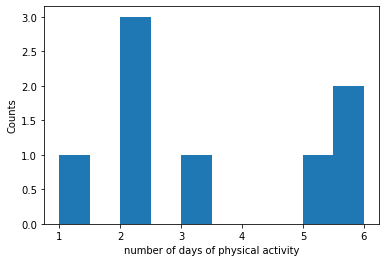

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read csv data
data = pd.read_csv('C:/Users/manuela.gabriel/PycharmProjects/AppleHealth/data/data_from_pre_pilot.csv')
intervals = [data[data.Week == i] for i in range(1,5)]

# Set new variables
week_number = 0
weekly_histograms = {}
prob_distribution_initial = np.array([[0.0]*8]*4)

#For each week we build a histogram with how many days the users achieved all goals (stars)
for interval in intervals:    
    contacts = interval['Contact'].drop_duplicates()
    week_histogram = np.array([0] * 8)     
                                
    for contact in contacts:
        week_goals = int(interval[interval.Contact == contact]['All_goals_achieved'].sum()) 
        week_histogram[week_goals] += 1

    # week_histogram contains the number of users that got from 0 to 8 stars each week
    weekly_histograms[week_number] = week_histogram
    week_number += 1
    

# Weekly Histogram
count, bins, patches = plt.hist(weekly_histograms[0])
plt.xlabel("number of days of physical activity")
plt.ylabel("Counts")



The sum of all probabilities is 1.0


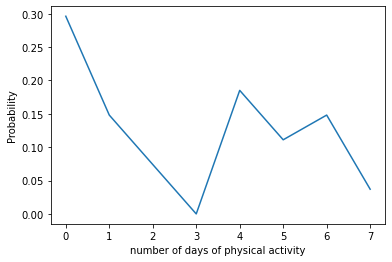

In [27]:
# Probability Distribution

for week_number in range(4):
    for i in range(8):
        prob_stars = weekly_histograms[week_number][i]
        prob_distribution_initial[week_number,i] = (prob_stars * 1.0) / sum(weekly_histograms[week_number])

# Let's look at a certain week
week = 3
print("The sum of all probabilities is", prob_distribution_initial[week].sum())

plt.plot(np.arange(0,8), prob_distribution_initial[week])
plt.xlabel("number of days of physical activity")
plt.ylabel("Probability")
plt.show()


### Monte Carlo Simulation

In [31]:
number_reps = 1000 
prob_distribution = prob_distribution_initial

weeks_per_month = 4
number_months = 24
weekly_histogram = {}
stars_per_week = np.array([[0] * (number_months)] * weeks_per_month)
stars_per_month = np.array([0] * (number_months))

rewards_by_user = []
stars_by_user = []

for i in range(number_reps):
    for month in range(number_months):
        for week in range(weeks_per_month):
            stars_per_week[week, month] = np.random.choice(8, 1, p=prob_distribution[week])
            weekly_histogram[week] = stars_per_week[week]
            
        stars_per_month[month] = stars_per_week[:, month].sum()

    stars_by_user.append(stars_per_month)
    

[ 4 11  6  6 10 10 17  8 11  6 13 15 21 15  1 14  9 13 11 10 23 12  9 15]


### Plot Program Results

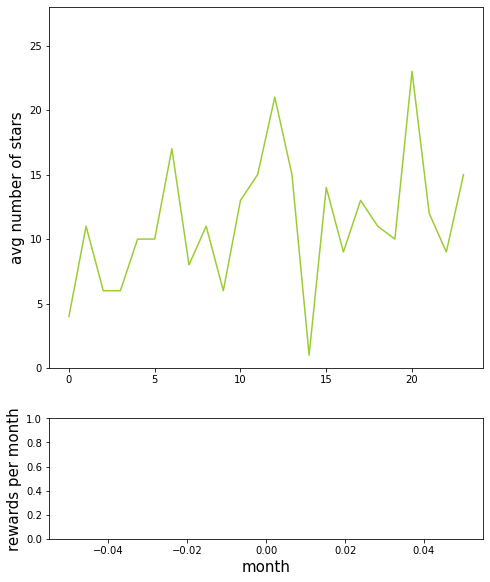

In [35]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns


fig = plt.figure(figsize=(7, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
ax1 = plt.subplot(gs[0])
color = 'yellowgreen'
        
plt.plot(pd.DataFrame(stars_by_user).mean(), color=color)
plt.ylabel("avg number of stars", fontsize=15)
plt.ylim(0, 28)

ax2 = plt.subplot(gs[1])
color = 'orange'
plt.plot(rewards_by_user, color=color, marker='3')
plt.ylabel('rewards per month', fontsize=15)  
plt.ylim(0, 1)
plt.tight_layout()
plt.xlabel("month", fontsize=15)
plt.show()

